# Women's E-Commerce Reviews Prediction  

## Import Libraries and Dataset

In [1]:
import pandas as pd
import nltk
import numpy as np
import keras

Using TensorFlow backend.


import data frame from csv found on Kaggle

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

check out data and features (we will focus on review text and ratings)

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Exploratory Data Analysis

find out how much data we have and different types

In [4]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


we should trim down 'ratings,' to be binary for easier analysis

In [6]:
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

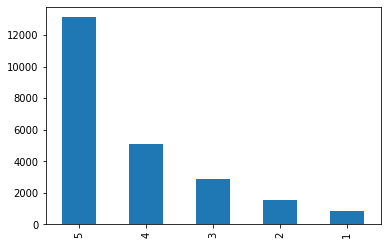

In [8]:
df['Rating'].value_counts().plot(kind='bar')

I am thinking that I want to have values 1-3 be negative, while 4-5 being positive reviews 

In [15]:
array = [0]
df.loc[(df['Rating'] == 3) & df['Recommended IND'].isin(array)].count()

Unnamed: 0                 1682
Clothing ID                1682
Age                        1682
Title                      1444
Review Text                1653
Rating                     1682
Recommended IND            1682
Positive Feedback Count    1682
Division Name              1682
Department Name            1682
Class Name                 1682
dtype: int64

In [11]:
array = [1]
df.loc[(df['Rating'] == 3) & df['Recommended IND'].isin(array)].count()

Unnamed: 0                 1189
Clothing ID                1189
Age                        1189
Title                      1020
Review Text                1170
Rating                     1189
Recommended IND            1189
Positive Feedback Count    1189
Division Name              1189
Department Name            1189
Class Name                 1189
dtype: int64

We should have 1-3 grouped with 'would not reccomend" as most people did not find it helpful (0 in Recommended IND means it was not helpful)

In [12]:
df['target'] = np.where(df['Rating']>3, 1, 0)

^^ this makes the target column where we will do all our testing 

## Text Cleanup 

In [13]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

dropped an uneeded column

In [17]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,target
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1


some rows did not have a review text, so I wanted to get rid of those

In [18]:
df = df[df['Review Text'].notna()]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 11 columns):
Clothing ID                22641 non-null int64
Age                        22641 non-null int64
Title                      19675 non-null object
Review Text                22641 non-null object
Rating                     22641 non-null int64
Recommended IND            22641 non-null int64
Positive Feedback Count    22641 non-null int64
Division Name              22628 non-null object
Department Name            22628 non-null object
Class Name                 22628 non-null object
target                     22641 non-null int64
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


know that all rows have text now 

I removed all non alphabetical characters in the text

In [20]:
df['alph text'] = df['Review Text'].str.replace('[^\w\s]','')

made all text lower case

In [21]:
df['lower text'] = df['alph text'].str.lower()

looked at and removed stopwords (common words in english that would
just clutter our analysis)

In [22]:
from nltk.corpus import stopwords
stopW = (stopwords.words('english'))
print(stopW)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

I see that many of these top words are stop words and will only impede my analysis

In [23]:
from collections import Counter
Counter(" ".join(df['lower text']).split()).most_common(50)

[('the', 75904),
 ('i', 58899),
 ('and', 48831),
 ('a', 42798),
 ('it', 42530),
 ('is', 30619),
 ('this', 25680),
 ('to', 24440),
 ('in', 20571),
 ('but', 16392),
 ('on', 15181),
 ('for', 13986),
 ('of', 13421),
 ('with', 12780),
 ('was', 12216),
 ('so', 11899),
 ('my', 11015),
 ('dress', 10460),
 ('not', 9688),
 ('that', 9542),
 ('love', 8916),
 ('size', 8687),
 ('very', 8169),
 ('have', 8042),
 ('top', 7323),
 ('are', 7274),
 ('fit', 7238),
 ('its', 7173),
 ('be', 7023),
 ('like', 6992),
 ('as', 6688),
 ('me', 6650),
 ('wear', 6414),
 ('great', 6076),
 ('too', 6009),
 ('im', 5974),
 ('or', 5782),
 ('am', 5741),
 ('just', 5572),
 ('you', 5178),
 ('would', 5010),
 ('they', 4954),
 ('at', 4799),
 ('fabric', 4755),
 ('up', 4729),
 ('color', 4557),
 ('small', 4539),
 ('look', 4014),
 ('if', 3945),
 ('really', 3921)]

In [25]:
df['nostop text'] = df['lower text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopW]))

a stemmer will remove suffixes on words so words that mean the same can be analyzed together, an example of it working is below

In [26]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
print(stemmer.stem("Likely"))
print(stemmer.stem("Liked"))
print(stemmer.stem("Liking"))

like
like
like


I apply the stemmer to my text

In [28]:
df['stem text'] = df['nostop text'].apply(stemmer.stem)

you can see the progression of the text below

In [29]:
df.head() 

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,target,alph text,lower text,nostop text,stem text
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1,Absolutely wonderful silky and sexy and comfo...,absolutely wonderful silky and sexy and comfo...,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfort
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1,Love this dress its sooo pretty i happened t...,love this dress its sooo pretty i happened t...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0,I had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...,high hopes dress really wanted work initially ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1,I love love love this jumpsuit its fun flirty ...,i love love love this jumpsuit its fun flirty ...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1,This shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...


In [30]:
df.groupby('target').size()

target
0     5193
1    17448
dtype: int64

remember our target 0 is 'negative' while 1 is 'positive'

## TFIDF and Evaluation 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

TF-IDF or term frequency/inverse document frequency is a statistical measure of importance for words in a document vs the entire corpus

In [33]:
tfidf = TfidfVectorizer(ngram_range=(1, 2))
X = tfidf.fit_transform(df['stem text'])

In [35]:
y = df['target']

in order to properly predict on the data we need to split it into a training and testing set, y is the value we are trying to predict on, X is the input text data 

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [37]:
from sklearn.linear_model import LogisticRegression

I fit a logistic regression to my data to try to predict what the review would be based on the review text

In [38]:
model = LogisticRegression(C=0.2, dual=True)
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = (preds==y_test).mean()
print(f'Accuracy: {acc}')

/Users/annakrause/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7880326782954294


my accuracy was .788 or 78.8%, the confusion matrix below shows the number of true positives, false positives, false negatives, true negatives

In [40]:
confusion_matrix(y_test, preds)

array([[  93,  952],
       [   8, 3476]])

looks like I had quite a few false positives

this is the amount of words I had that were evaluated 

In [41]:
vocab = tfidf.get_feature_names()
len(vocab)

305533

this gives me a chart of my top ten words that were more likely to predict a positive or negative review

In [42]:
coef_df = pd.DataFrame({'vocab': vocab, 'coef':model.coef_.reshape(-1)})
pos_top10 = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)[:10]
neg_top10 = coef_df.sort_values('coef').reset_index(drop=True)[:10]

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

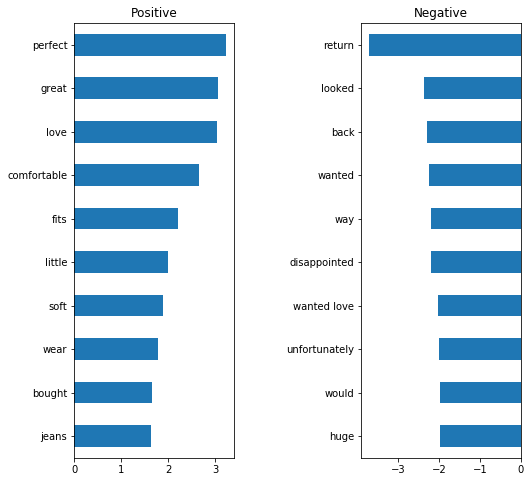

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(8, 8))
fig.subplots_adjust(wspace=0.8)
pos_top10.sort_values('coef').plot.barh(legend=False, ax=axs[0])
axs[0].set_yticklabels(pos_top10['vocab'].values.tolist()[::-1])
axs[0].set_title('Positive');
neg_top10.sort_values('coef', ascending=False).plot.barh(legend=False, ax=axs[1])
axs[1].set_yticklabels(neg_top10['vocab'].values.tolist()[::-1])
axs[1].set_title('Negative');

I think that 'return' is an interesting resuly for a negative word, and the 'little' being a positive word and 'huge' being a negative word

## Neural Network

new train/test split

In [45]:
Xnn_train, Xnn_test, ynn_train, ynn_test = train_test_split(
    df['alph text'], df['target'], test_size=0.2)

This time I used a count vectorizer(to tokenize the words and put them into an encoded vector that has the length of the entire vocabulary and an integer count for the number of times each word appeared in the document). This vectorizer also had stopwords and  lowercase capabilities in it

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
 
vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'), 
                             lowercase=True, min_df=3, max_df=0.9, max_features=5000)
X_train_onehot = vectorizer.fit_transform(Xnn_train)

here I emport my keras model (one of the simplest)
Dense is a layer in my NN
I added a relu activation layer and a sigmoid activation layer
The way to calculate loss will be through binary crossentropy 
My optimization algorithm is adam
And I will measure my NN through accuracy

In [47]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
 
model.add(Dense(units=500, activation='relu', input_dim=len(vectorizer.get_feature_names())))
model.add(Dense(units=1, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               2500500   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 501       
Total params: 2,501,001
Trainable params: 2,501,001
Non-trainable params: 0
_________________________________________________________________


I then fit my data to this model! I will run it 5 times, and use a section of my training data to act as an earlier 'test' data called validation data

In [48]:
model.fit(X_train_onehot[:-100], ynn_train[:-100], 
          epochs=5, batch_size=128, verbose=1, 
          validation_data=(X_train_onehot[-100:], ynn_train[-100:]))

Train on 18012 samples, validate on 100 samples
Epoch 1/5
18012/18012 [==============================] - 4s 241us/step - loss: 0.3359 - accuracy: 0.8539 - val_loss: 0.3703 - val_accuracy: 0.8700
Epoch 2/5
18012/18012 [==============================] - 4s 239us/step - loss: 0.2051 - accuracy: 0.9187 - val_loss: 0.3720 - val_accuracy: 0.8800
Epoch 3/5
18012/18012 [==============================] - 4s 231us/step - loss: 0.1369 - accuracy: 0.9499 - val_loss: 0.4648 - val_accuracy: 0.8700
Epoch 4/5
18012/18012 [==============================] - 4s 233us/step - loss: 0.0796 - accuracy: 0.9766 - val_loss: 0.5226 - val_accuracy: 0.8800
Epoch 5/5
18012/18012 [==============================] - 4s 247us/step - loss: 0.0430 - accuracy: 0.9905 - val_loss: 0.5978 - val_accuracy: 0.8900


my accuracy stayed around 88%, below I test my model on my holdout test data

In [49]:
scores = model.evaluate(vectorizer.transform(Xnn_test), ynn_test, verbose=1)
print("Accuracy:", scores[1])

4529/4529 [==============================] - 0s 106us/step
Accuracy: 0.8706116080284119


my accuracy is again 87%, which is much better than the earlier logistic regression, showing the power of neutral networks using Keras!

sources: https://nlpforhackers.io/keras-intro/
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ https://machinelearningmastery.com/clean-text-machine-learning-python/
https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/
https://keras.io/